In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("style.mplstyle")  # A matplotlib "style" file to make plots look more like those in astro papers.
np.random.seed(20210430)

# Hypothesis Test for Significance

> Our results are significant and not due to random chance

> We have detected low-frequency quasi-periodic oscillation \[...\] with a **significance of 6.8σ** \[...\] 
> <br>&mdash; Saha et al. 2021

> \[We\] reach 1.8% precision and find $H_0=73.2 \pm 1.3$ km/sec/Mpc, a **4.2 sigma difference** with the prediction from Planck CMB observations under LambdaCDM.
> <br>&mdash; Riess et al. 2021

> \[We found\] a false alarm rate (FAR) of $<4.9 \times 10^−6$ yr$^{−1}$, yielding a **p-value for GW150914 of $<2 \times 10^{−7}$**
> <br>&mdash; Ligo and Virgo Collaboration 2016

## Setting up the Hypothesis Test
**Null hypothesis ($H_0$)**
: A testable hypothesis often stating that a feature of the **data is insigificant** and any observed due differences from what's expected is **due to random chance**. 
    
**Alternative hypothesis ($H_A$)**
: Any other hypothesis often stating that a feature of the **data is significant** and the differences are **not due to random chance**.

In [ ]:
die_tosses = np.repeat(
    (1,2,3,4,5,6),
    (5,0,6,3,4,12)
)

faces, counts = np.unique(die_tosses, return_counts=True)
plt.bar(faces, counts)
plt.title("Tosses of a Die")
plt.xlabel("Face")
plt.ylabel("Count")
plt.grid(axis='y')

**Null hypothesis**:

The die is does not favor sixes and is consistent with **rolling a fair die.**
    
**Alternative hypothesis**:

The die favors sixes.

## Null Hypothesis Test

Also known as "Monte Carlo hypothesis test"

* **Empirical Sample**: A sample taken by using measurements. 
* **Simulated Sample**: A sample taken by using a process that produces synthetic measurements.

In [ ]:
die_faces = (1, 2, 3, 4, 5, 6)
die_probs = [1/6] * 6

plt.bar(die_faces, die_probs)
plt.xlabel("Face")
plt.ylabel("Probability")
plt.show()

In [ ]:
def roll(die_faces, die_probs, nrolls=30):
    roll = np.random.choice(die_faces, p=die_probs, size=nrolls)
    return roll

result = roll(die_faces, die_probs)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

faces, counts = np.unique(die_tosses, return_counts=True)
axes[0].set_title("Empirical")
axes[0].bar(faces, counts)
axes[0].set_xlabel("Face")
axes[0].grid(axis='y')
axes[0].set_ylabel("Count")
axes[0].set_ylim(0, 15)

faces, counts = np.unique(result, return_counts=True) 
axes[1].set_title("Simulated")
axes[1].bar(faces, counts)
axes[1].set_xlabel("Face")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
def calculate_stats(sample):
    """Returns the proportion of "6" in the given sample (rolls of a die)."""
    sample = np.array(sample)
    # Typically you can do 
    # np.sum(sample == 6) / len(sample)
    
    # However, doesn't the above looks like an average of something?
    return np.mean(sample == 6)

def simulate(die_faces, die_probs, nrolls, reps):
    """Simulate `nrolls` tosses of a die given the die faces and probabilities for each side. 
    Repeat the simulation `reps` time calculating the statistics (as defined in `calculate_stats`) 
    and return a numpy array of those statistics.
    """
    results = []
    
    for i in range(reps):
        sample = roll(die_faces, die_probs, nrolls)
        statistics = calculate_stats(sample)
        results.append(statistics)
        
    return np.array(results)

In [ ]:
simulated_statistics = simulate(die_faces, die_probs, nrolls=30, reps=10000)

plt.hist(simulated_statistics, bins=np.arange(30)/30, histtype='step')
plt.xlabel("Proportion of Sixes")
plt.ylabel("Number of Simulations")
plt.show()

In [ ]:
empirical_statistic = calculate_stats(die_tosses)
pvalue = np.mean(simulated_statistics >= empirical_statistic)
print(f"p-value = {pvalue}")

plt.hist(simulated_statistics, bins=np.arange(30)/30, histtype='step', label="Simulated stats")
plt.axvline(empirical_statistic, color='orange', label="Empirical stats")

plt.xlabel("Proportion of Sixes")
plt.ylabel("Number of Simulations")
plt.xlim(0, 0.6)
plt.legend()
plt.show()

## Bootstrap Hypothesis Test

In [ ]:
x = np.linspace(0, 1, 100)
y = x/4 + stats.norm().rvs(len(x))

plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.show()

**Null hypothesis**:


    
**Alternative hypothesis**: 


In [ ]:
def calculate_slope(x, y):
    """Returns slope of least squares between x and y."""
    # This is a fancy analytical solution for (ordinary) least squares
    corr_xy = stats.pearsonr(x, y)[0]
    std_x = np.std(y)
    std_y = np.std(x)
    slope = corr_xy / (std_y / std_x)
    return slope

def simulate_bootstrap(x, y, reps):
    slopes = []
    for i in range(reps):
        # Sample with replacement
        # IMPORTANT: Each sample being is the same size as the original data
        sample_x = np.random.choice(x, len(x))
        sample_y = np.random.choice(y, len(y))
        
        slope = calculate_slope(sample_x, sample_y)
        slopes.append(slope)
        
    return np.array(slopes)

simulated_slopes = simulate_bootstrap(x, y, reps=10000)

plt.hist(simulated_slopes, bins=40, histtype='step')
plt.xlabel("Slope value")
plt.ylabel("Number of Simulations");

In [ ]:
empirical_slope = calculate_slope(x, y)
pvalue = np.mean(simulated_slopes >= empirical_slope)
print(f"p-value = {pvalue}")

plt.hist(simulated_slopes, bins=40, histtype='step', label="Simulated slopes")
plt.axvline(empirical_slope, color='#dd8452', label="Empirical slope")

plt.xlabel("Slope value")
plt.ylabel("Number of Simulations")
plt.legend();

# Uncertainty

$$
y = y_\mathrm{true} + \varepsilon
$$

## Sources of Uncertainties

* Physics phenomena 
    * Photon noise, photoexcitation from the emitter.<br>
    https://people.csail.mit.edu/hasinoff/pubs/hasinoff-photon-2012-preprint.pdf
    * Thermal fluctuation within the measurement sensors.
    * Cosmic rays
    * etc
* Probabilistic regression
    * Bayesian model's posterior distribution
    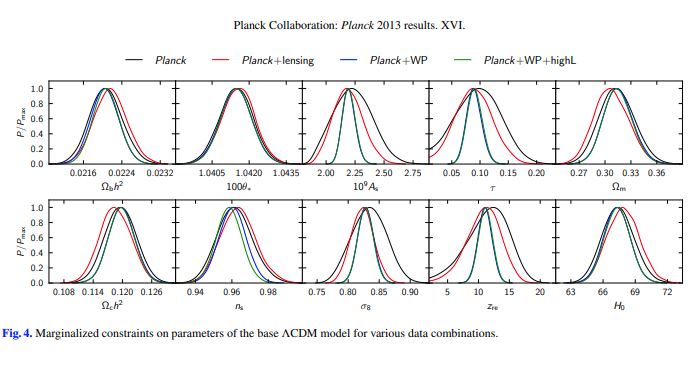

## Gaussian Uncertainty

$$
y = y_\mathrm{true} + \varepsilon
$$

Where $\varepsilon$ is distributed as Gaussian (or Normal) with mean 0 and scatter $\sigma_\mathrm{true}$

$$
y = \overline{Y} \pm \sigma
$$

Where $Y$ is a set of $N$ measurements of $y$ with mean $\overline{Y}$ and scatter* $\sigma$

<small>*This estimates the true scatter $\sigma_\mathrm{true}$ using the root mean square of $Y$</small>

In [ ]:
size = 100
y_true = 1
sigma_true = 1

error_dist = stats.norm(0, sigma_true)
errors = error_dist.rvs(size)
y = y_true + errors

# Plot
plt.hist(y, 20, density=True, label="Empirical", histtype='step')

xrange = np.linspace(-3, 4, 100)
plt.plot(xrange, stats.norm(y_true, sigma_true).pdf(xrange), label="True")

plt.title(f"$\overline{{Y}}$={np.mean(y):.2f}, $\sigma$={np.std(y):.2f}")
plt.xlabel(f"$y$")
plt.ylabel("Density")
plt.legend()
plt.show()

## Error Propogation by Sampling

In [ ]:
import pandas as pd

y, y_sigma = 10, 3
x, x_sigma = 40, 4

pd.DataFrame([
    {'x': x, 'x_sigma': x_sigma, 'y': y, 'y_sigma': y_sigma},
    {'x': '...', 'x_sigma': '...', 'y': '...', 'y_sigma': '...'}
])

In [ ]:
def f(x, y):
    return x + y

sample_size = 100
y_sample = stats.norm(y, y_sigma).rvs(sample_size)
x_sample = stats.norm(x, x_sigma).rvs(sample_size)
f_sample = f(x_sample, y_sample)

plt.hist(f_sample, bins=20, histtype='step')
plt.title(f"$\overline{{f}}={np.mean(f_sample):.2f}$, $\sigma={np.std(f_sample):.2f}$")
plt.xlabel(f"$f(x,y) = x + y$")
plt.ylabel("Density")
plt.show()

In [ ]:
def f(x):
    return -2.5 * np.log10(x)

x, x_sigma = 1e10, 1e8

size = 100
x_sample = stats.norm(x, x_sigma).rvs(size)
f_sample = f(x_sample)

plt.hist(f_sample, bins=20, histtype='step')
plt.title(f"$\overline{{f}}={np.mean(f_sample):.2f}$, $\sigma={np.std(f_sample):.5f}$")
plt.xlabel(f"$f(x) = -2.5\log_{{10}}(x)$")
plt.ylabel("Density")
plt.show()

## BONUS: Error Propogation by Variance

An analytical method to error propogation is by definition to calculate the variance of the function applied to your random variable. As usual there are only certain situations where we can find the analytical solution easily. One of those happens to be the linear combination of variables with Gaussian errors.

Let $x$ and $y$ be a variable with Gaussian random error. Both errors have the same mean but different scatter* $\sigma_x$ and $\sigma_y$ respectively. A neat trick is write $y$ and $x$ in "random variable notation",

$$ 
y = y_\mathrm{true} + \sigma_y Z_y \\
x = x_\mathrm{true} + \sigma_x Z_x \,,
$$

where $Z_x$ and $Z_y$ are two independent random variables distributed as the "standard normal" (a Gaussian with mean 0 and scatter 1). This should not be that surprising as you know the $y_\text{true}$ constant shifts the Gaussian left and right while the $\sigma_y$ constant scales the width of the Gaussian. This is why in `scipy.stats.norm`, the parameter names are `loc` and `scale`.

Let $A=f(x,y)$ and the scatter of $A$ is given by the square root variance (definition of scatter)

$$
A \equiv f(y, x)\\
\sigma_A \equiv \sqrt{\text{Var}(A)}
$$

<small>\*In physics, "scatter (parameter)" refers to what in statistics calls the "standard deviation". You are likely familiar with this term when looking at exam scores.</small>

### Analytical solution for sums of two independent Gaussian variables

Let $f(x,y) = x + y$, then $A$ is,

$$
A = x + y\\
A = y_\mathrm{true} + \sigma_y Z_y + x_\mathrm{true} + \sigma_x Z_x
$$

Now let's calculate the variance. We will not review variance here so you'll have to trust me with these properties. 

1. The variance of a constant is always 0 (since constants do not vary)
2. The variance of a normal random variable is always the square of its scatter parameter ($\sigma$) (by definition). 
3. The variance of a product between a constant and a random variable "takes out" the constant squared.
   $$\mathrm{Var}(cX) = c^2 \mathrm{Var}(X)$$
   
   You can convinced yourself this by plotting the histogram of some sample from a normal distribution multiplied by 2. Notice the width of the histogram is wider by a factor of 2 and the variance is the square of that.
   
4. The variance of the sum of two random variables $X$ and $Y$ is the sum of the individual variances only if the two random variables are independent
    $$\mathrm{Var}(X + Y) = \mathrm{Var}(X) + \mathrm{Var}(Y)$$
    
With the above properties, we notice each term in $A$ is independent from every other term (constants are never dependent and $Z_x$ and $Z_y$ are independent as stated above). Then the variance of $A$ is the variance of each term!

$$
\begin{align}
\text{Var}(A) &= \text{Var}\left(x_\mathrm{true} + \sigma_x Z_x + y_\mathrm{true} + \sigma_y Z_y\right)\\
&= \text{Var}(x_\text{true}) + \text{Var}(\sigma_x Z_x) + \text{Var}(y_\text{true}) + \text{Var}(\sigma_y Z_y) \\
&= 0 + \sigma_x^2\text{Var}(Z_x) + 0 + \sigma_y^2\text{Var}( Z_y) \\
&= \sigma_x^2 \cdot 1^2 + \sigma_y^2 \cdot 1^2 \\
&= \sigma_x^2 + \sigma_y^2
\end{align}
$$

Therefore,

$$
\boxed{\sigma_A = \sqrt{\text{Var}(A)} = \sqrt{\sigma_x^2 + \sigma_y^2}}\\
\boxed{\sigma_{x+y} = \sqrt{\sigma_x^2 + \sigma_y^2}}
$$

## Resources

* Data 8: The Foundations of Data Science. <br>
    * Working with data
    * Sampling
    * https://inferentialthinking.com/chapters/intro.html
* Data 100: Principles and Techniques of Data Science<br> 
    * Exploratory data analysis
    * Machine learning regression and classification
    * https://www.textbook.ds100.org/intro.html
* Prob 140: Probability for Data Science <br>
    * Probability theory
    * Computational statistics
    * http://prob140.org/textbook/content/README.html
* Astro 128/256: Astro Datalab <br>
* Physics 151: Data science and Bayesian statistics for physical sciences

